# **Data Analytics**

## Objectives

* Make statistical analysis of the data - look for correlations between the variables.
* Validating the Hypothesis.

## Inputs

* mountains_vs_beaches_preferences.csv is the raw data - collected in the 01_Data_Collection notebook.

## Outputs

* A statistical analysis of the data - there will be plots and tables to help us understand the data and validate the hypothesis.

## Additional Comments

* Please select Python 3.8.18 for the kernel of this notebook.
* This notebook was inspired by the data Collection Jupyter notebook in the Churnometer walkthrough project.
* SMOTE operations are inspired by Orhan Serçe - under this link: https://www.kaggle.com/code/orhansere/mountains-vs-beaches-smote-classification



---

Here we are gonna be sure that plots are displayed.

In [1]:
%matplotlib inline

We now load the data

In [2]:
import os
import pandas as pd

home_dir = "/workspace/DestinationDNA"
csv_dir = "outputs/datasets/raw"
csv_file = "mountains_vs_beaches_preferences.csv"
os.chdir(home_dir)
current_dir = os.getcwd()
print(current_dir)
df = pd.read_csv(f"{csv_dir}/{csv_file}")

/workspace/DestinationDNA


## Section 1: Profile Report

In this section, we will check the data profile report.

In [ ]:
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As seen in the Report - the Preference is unbalanced - we have 74.9% of zeros. That means that the dfset has much more people that prefer beaches than mountains. We will check this in visually in the next steps.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Preference', ylabel='Count'>

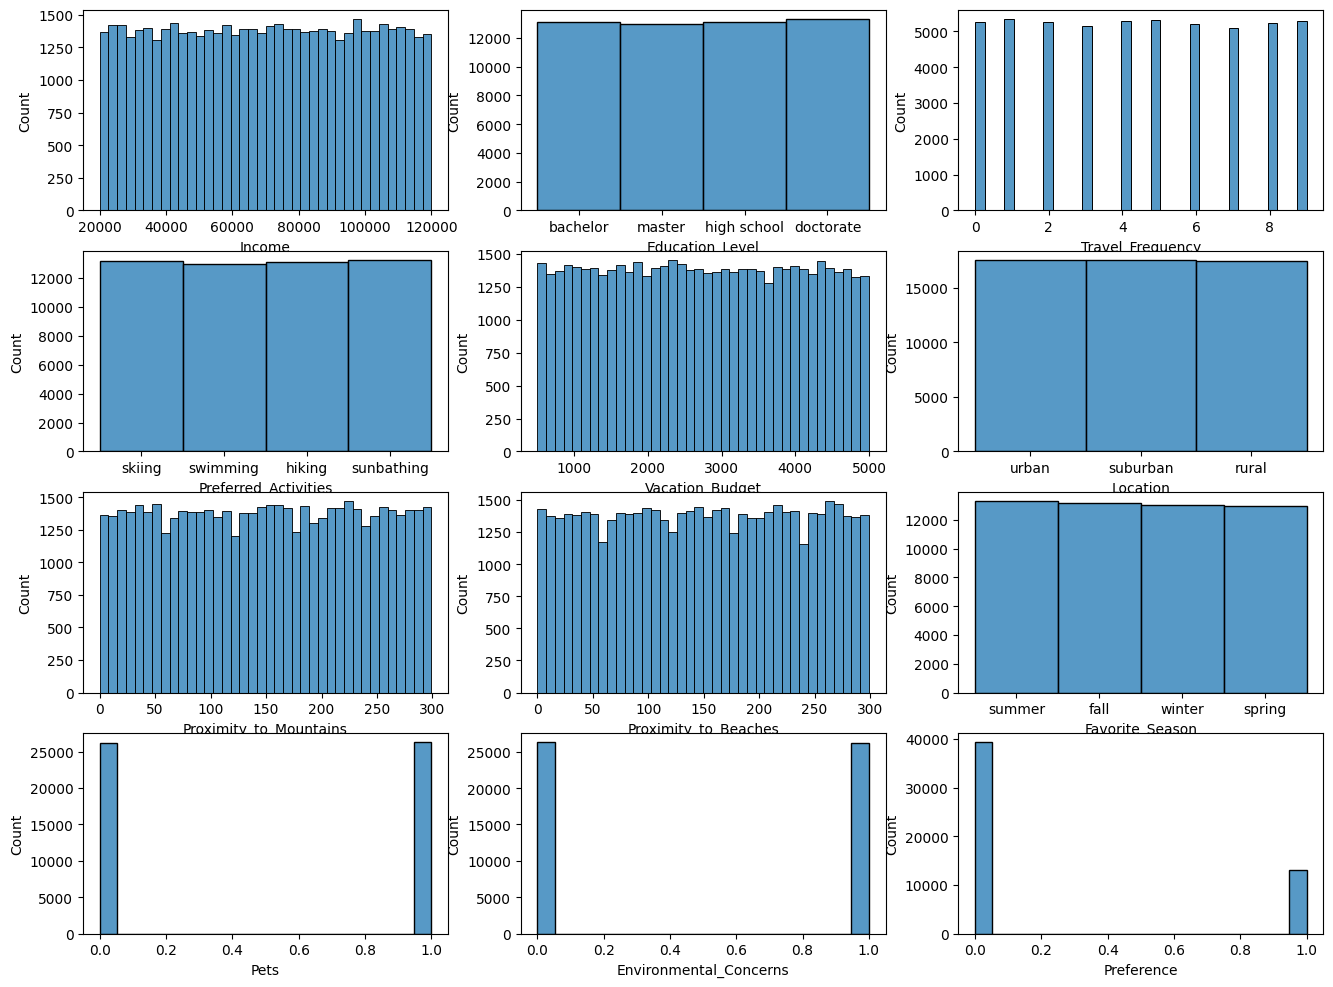

In [ ]:
fig, axes = plt.subplots(4,3, figsize=(16, 12))

sns.histplot(df['Income'], ax=axes[0,0])

sns.histplot(df['Education_Level'],  ax=axes[0, 1])

sns.histplot(df['Travel_Frequency'], ax=axes[0, 2])

sns.histplot(df['Preferred_Activities'],  ax=axes[1, 0])

sns.histplot(df['Vacation_Budget'], ax=axes[1, 1])

sns.histplot(df['Location'], ax=axes[1, 2])

sns.histplot(df['Proximity_to_Mountains'],ax=axes[2, 0])

sns.histplot(df['Proximity_to_Beaches'],ax=axes[2, 1])

sns.histplot(df['Favorite_Season'], ax=axes[2, 2])

sns.histplot(df['Pets'], ax=axes[3, 0])

sns.histplot(df['Environmental_Concerns'], ax=axes[3, 1])

sns.histplot(df['Preference'], ax=axes[3,2])

As seen in the plots above, the data is mainly balanced - except of the most important variable - the Preference. We will need to balance this data in another section.

---

## Section 2: Correlation

In this section, we will check the correlations of the dfset and visualize them.

Converting categorical variables into numerical ones.

In [ ]:
print(df.head())
df_encoded = pd.get_dummies(df, drop_first=True)

   Age      Gender  Income Education_Level  Travel_Frequency  \
0   56        male   71477        bachelor                 9   
1   69        male   88740          master                 1   
2   46      female   46562          master                 0   
3   32  non-binary   99044     high school                 6   
4   60      female  106583     high school                 5   

  Preferred_Activities  Vacation_Budget  Location  Proximity_to_Mountains  \
0               skiing             2477     urban                     175   
1             swimming             4777  suburban                     228   
2               skiing             1469     urban                      71   
3               hiking             1482     rural                      31   
4           sunbathing              516  suburban                      23   

   Proximity_to_Beaches Favorite_Season  Pets  Environmental_Concerns  \
0                   267          summer     0                       1   
1     

Showing the correlation matrix.

In [ ]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                                      Age    Income  Travel_Frequency  \
Age                              1.000000 -0.000005          0.004428   
Income                          -0.000005  1.000000         -0.000378   
Travel_Frequency                 0.004428 -0.000378          1.000000   
Vacation_Budget                  0.002223 -0.000731          0.003593   
Proximity_to_Mountains           0.006305 -0.005125          0.007187   
Proximity_to_Beaches             0.002821  0.000956         -0.003404   
Pets                             0.010091  0.003554          0.003719   
Environmental_Concerns           0.002251 -0.007597          0.003031   
Preference                       0.000990 -0.002998         -0.001680   
Gender_male                      0.004295 -0.002006         -0.001713   
Gender_non-binary                0.001188 -0.006150          0.001037   
Education_Level_doctorate       -0.003467 -0.002544         -0.001430   
Education_Level_high school      0.005994  0.000321

Here we generate a heatmap visualization of the correlation matrix, displaying the linear relationships between features in the dataset.

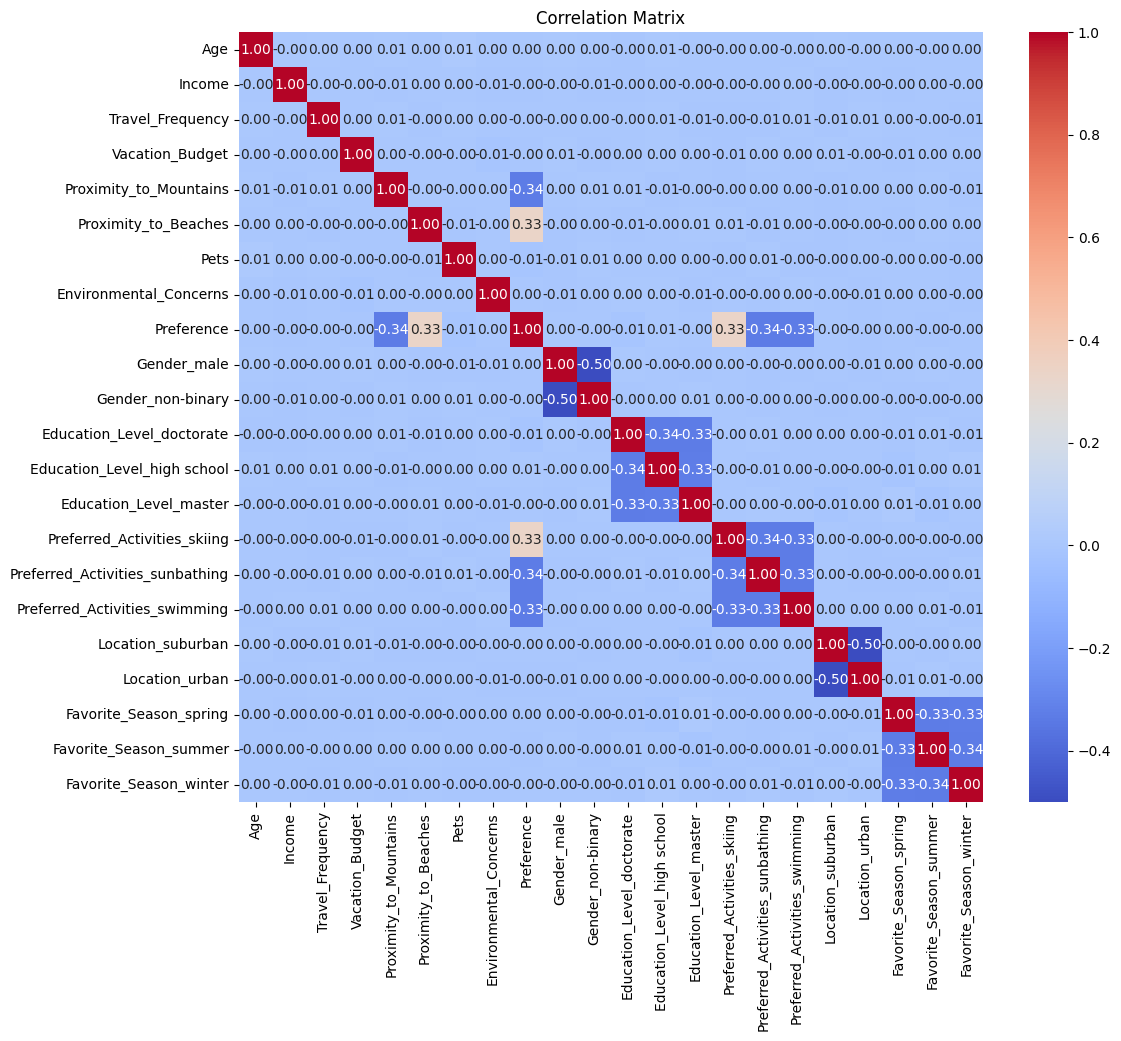

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Here we calculate the correlation of each feature with the target variable 'Preference'.

In [ ]:
preference_correlation = correlation_matrix['Preference'].sort_values(ascending=False)

print(preference_correlation)

Preference                         1.000000
Proximity_to_Beaches               0.334848
Preferred_Activities_skiing        0.333179
Education_Level_high school        0.007402
Favorite_Season_spring             0.001720
Environmental_Concerns             0.001457
Age                                0.000990
Gender_male                        0.000479
Gender_non-binary                 -0.000018
Favorite_Season_winter            -0.000604
Education_Level_master            -0.001646
Travel_Frequency                  -0.001680
Location_suburban                 -0.001689
Location_urban                    -0.002551
Income                            -0.002998
Favorite_Season_summer            -0.003553
Vacation_Budget                   -0.004754
Education_Level_doctorate         -0.010582
Pets                              -0.011375
Preferred_Activities_swimming     -0.331294
Proximity_to_Mountains            -0.335373
Preferred_Activities_sunbathing   -0.335828
Name: Preference, dtype: float64

---

In [ ]:
import ppscore as pps

pps_raw = pps.matrix(df=df)
pps_raw.head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Age,Age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,Age,Gender,0.0,classification,True,weighted F1,0.3358,0.323164,DecisionTreeClassifier()
2,Age,Income,0.0,regression,True,mean absolute error,24857.0748,25005.214147,DecisionTreeRegressor()
3,Age,Education_Level,0.0,classification,True,weighted F1,0.2508,0.240333,DecisionTreeClassifier()
4,Age,Travel_Frequency,0.0,regression,True,mean absolute error,2.4810,2.496164,DecisionTreeRegressor()


In [ ]:
pps_filtered = pps_raw[pps_raw['ppscore'] > 0].sort_values(by='ppscore', ascending=False)
pps_filtered[['x', 'y', 'ppscore']].head(10)

,x,y,ppscore
0,Age,Age,1.0
60,Travel_Frequency,Travel_Frequency,1.0
180,Environmental_Concerns,Environmental_Concerns,1.0
165,Pets,Pets,1.0
150,Favorite_Season,Favorite_Season,1.0
135,Proximity_to_Beaches,Proximity_to_Beaches,1.0
120,Proximity_to_Mountains,Proximity_to_Mountains,1.0
105,Location,Location,1.0
90,Vacation_Budget,Vacation_Budget,1.0
75,Preferred_Activities,Preferred_Activities,1.0


In [ ]:
pps_raw_sorted = pps_raw.sort_values(by="ppscore", ascending=False)
print(pps_raw_sorted.head(10))

                          x                       y  ppscore            case  \
0                       Age                     Age      1.0  predict_itself   
15                   Gender                  Gender      1.0  predict_itself   
180  Environmental_Concerns  Environmental_Concerns      1.0  predict_itself   
165                    Pets                    Pets      1.0  predict_itself   
150         Favorite_Season         Favorite_Season      1.0  predict_itself   
135    Proximity_to_Beaches    Proximity_to_Beaches      1.0  predict_itself   
120  Proximity_to_Mountains  Proximity_to_Mountains      1.0  predict_itself   
105                Location                Location      1.0  predict_itself   
90          Vacation_Budget         Vacation_Budget      1.0  predict_itself   
75     Preferred_Activities    Preferred_Activities      1.0  predict_itself   

     is_valid_score metric  baseline_score  model_score model  
0              True   None             0.0          1.0

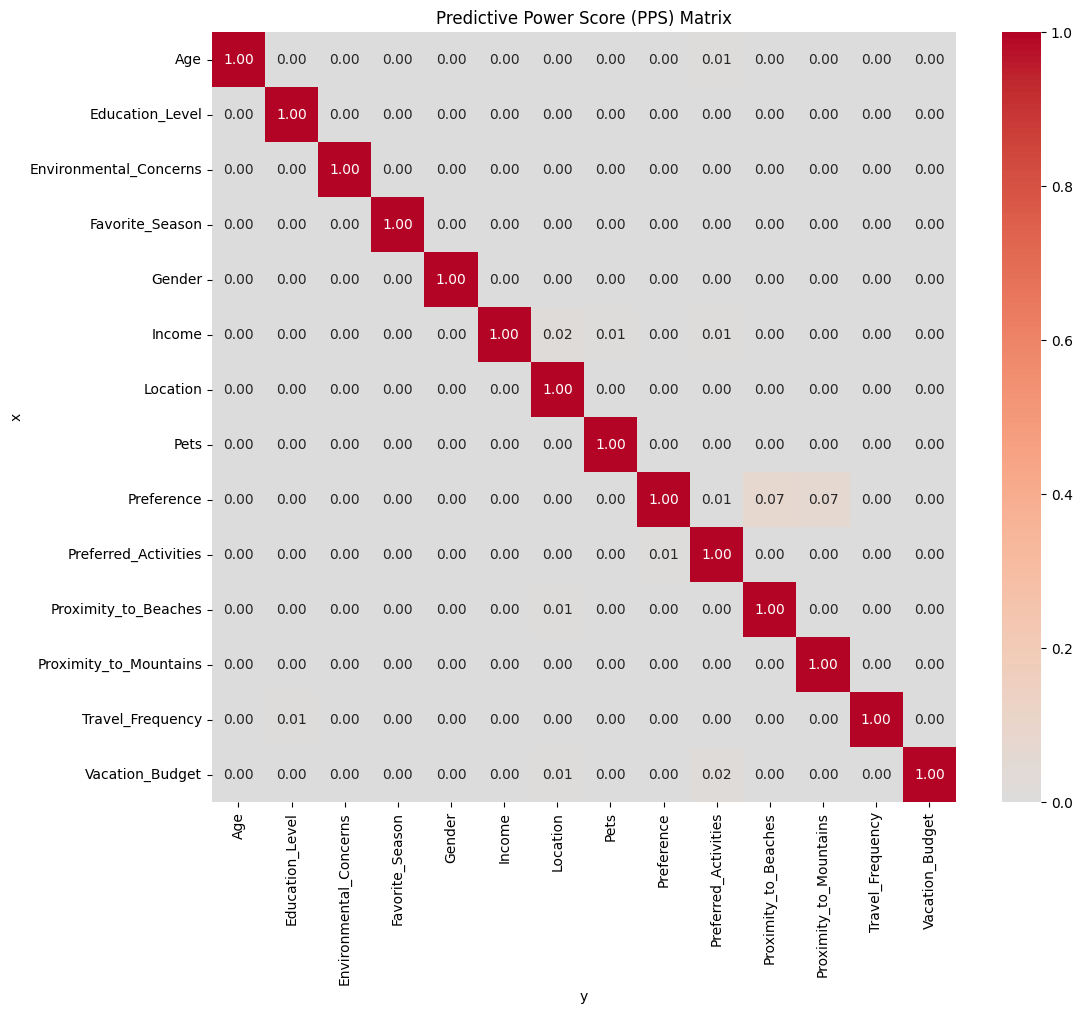

In [ ]:
pps_pivot = pps_raw.pivot(index='x', columns='y', values='ppscore')

plt.figure(figsize=(12, 10))
sns.heatmap(pps_pivot, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

In [ ]:
pps_filtered = pps_raw[(pps_raw["ppscore"] > 0) & (pps_raw["case"] != "predict_itself")]
print(pps_filtered.sort_values(by="ppscore", ascending=False).head(10))

                        x                       y   ppscore            case  \
191            Preference    Proximity_to_Beaches  0.072116      regression   
190            Preference  Proximity_to_Mountains  0.065219      regression   
89        Vacation_Budget    Preferred_Activities  0.015720  classification   
35                 Income                Location  0.015656  classification   
5                     Age    Preferred_Activities  0.012653  classification   
39                 Income                    Pets  0.011080      regression   
83   Preferred_Activities              Preference  0.011041      regression   
133  Proximity_to_Beaches                Location  0.009482  classification   
33                 Income    Preferred_Activities  0.009213  classification   
91        Vacation_Budget                Location  0.008263  classification   

     is_valid_score               metric  baseline_score  model_score  \
191            True  mean absolute error         74.4074 

### Conclusion

The correlation matrix shows that the variables are not heavily correlated with each other. The correlation with the target variable is not very high either. We will need to balance the data and use a classification model to validate the hypothesis.